In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Leemos el data frame de acceso a internet fijo por tecnologia

In [ ]:
df1 = pd.read_csv('/content/AccesosaInternetfijoportecnologiaylocalidad_2791751688614976172.csv',sep=';')

In [ ]:
df1.head()# vemos los primeros 5 registros

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4704,0,2,0,975,0,664,7218
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


In [ ]:
df1.info() # analizamos el tipo de dato de cada variable, no es neceario hacer transfomaciones.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3142 non-null   object
 1   Partido        3142 non-null   object
 2   Localidad      3142 non-null   object
 3   Link Indec     3142 non-null   object
 4   ADSL           3142 non-null   int64 
 5   CABLEMODEM     3142 non-null   int64 
 6   DIAL UP        3142 non-null   int64 
 7   FIBRA OPTICA   3142 non-null   int64 
 8   OTROS          3142 non-null   int64 
 9   SATELITAL      3142 non-null   int64 
 10  WIMAX          3142 non-null   int64 
 11  WIRELESS       3142 non-null   int64 
 12  Total general  3142 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 319.2+ KB


Analizamos por provincia la distribución por tecnologia y el total general de accesos

In [ ]:
tecnologia_provincia=df1[['Provincia','ADSL','CABLEMODEM','DIAL UP','FIBRA OPTICA','SATELITAL','WIMAX','WIRELESS','OTROS','Total general']].groupby('Provincia').sum().reset_index().sort_values(by='Total general',ascending=False)

En la tabla se puede observar que las cinco provincias con mayor acceso de internet son: BUENOS AIRES, CABA,CORDOBA, SANTAFE, MENDOZA

In [ ]:
tecnologia_provincia.head(5)

,Provincia,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,SATELITAL,WIMAX,WIRELESS,OTROS,Total general
0,Buenos Aires,339648,2748325,6199,1436433,1307,1672,126846,61238,4721668
1,Caba,140791,1240125,2145,129218,57,0,5758,29585,1547679
5,Cordoba,163770,465461,68,338570,100,58,61070,9571,1038668
20,Santa Fe,183740,426255,110,215189,137,0,43079,19300,887810
12,Mendoza,37659,78858,777,142615,50,0,27625,1939,289523


Seleccionamos las columnas con los accesos por tecnologia, para graficar e identificar las principales tecnologias usadas.

In [ ]:
sum_tecnologia=tecnologia_provincia.iloc[:,1:9].sum().sort_values(ascending=False).reset_index()

En el gráfico se evidencian las principales tecnologias usadas: cablemodem, fibra optica, ADSL, WIRELESS

[Text(0.5, 1.0, 'Total accesos por tecnologia')]

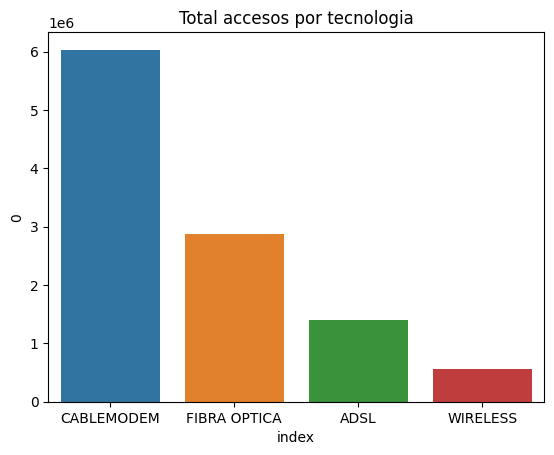

In [ ]:
sns.barplot(x='index',y=0,data=sum_tecnologia.loc[0:3]).set(title='Total accesos por tecnologia')

Extraemos información sobre población en argentina, dispostivos con acceso a internet para identificar oportunidades de negocio, los datos provienen del censo nacional realizado en 2022 y extraidos de la base de datos del gobierno de Argentina. https://www.indec.gob.ar/indec/web/Nivel4-Tema-2-41-165

In [ ]:
df2= pd.read_csv('censo argentina 2022.csv',encoding= 'latin1')

In [ ]:
df2.info() # los datos tienen el tipo de dato correcto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Provincia                        24 non-null     object 
 1   Internet % uso                   24 non-null     float64
 2   Celular con internet             24 non-null     float64
 3   Computadora tablet etc           24 non-null     float64
 4   Total de viviendas particulares  24 non-null     int64  
 5   Total de viviendas colectivas    24 non-null     int64  
 6   Total de población               24 non-null     int64  
 7   TOTAL VIVIENDAS                  24 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 1.6+ KB


In [ ]:
df2.head(4) # vemos los primeros 4 registros del df

,Provincia,Internet % uso,Celular con internet,Computadora tablet etc,Total de viviendas particulares,Total de viviendas colectivas,Total de población,TOTAL VIVIENDAS
0,Buenos Aires,82.1,91.3,59.5,6695273,6535,17569053,6701808
1,Caba,90.6,94.0,81.3,1638764,1946,3120612,1640710
2,Catamarca,66.8,85.7,50.4,158989,449,429556,159438
3,Chaco,64.0,83.3,46.4,401658,443,1142963,402101


Para poder cruzar la información; la columna provincia de los data frame 1 y 2 debe estar escrita igual, procedemos a estandarizar y reemplazar los nombres.

In [ ]:
diccionario_provincias= {'Córdoba':'Cordoba','Entre Ríos':'Entre Rios','Neuquén':'Neuquen','Río Negro':'Rio Negro','Tucumán':'Tucuman'}

In [ ]:
df2.replace(diccionario_provincias,inplace=True)# realizamos el reemplazo de las provincias con tildes por sin tildes

El dataframe 1 que contiene las privincias por tecnologia y df con censo, el nombre de la provincia lo escribimos en titulo, primera palabra en mayusculas, lo demás en minusculas.

In [ ]:
tecnologia_provincia['Provincia']= tecnologia_provincia['Provincia'].str.title()

In [ ]:
df2['Provincia']= df2['Provincia'].str.title()

Unimos los dos dataframe

In [ ]:
censo_tecnologia=df2.merge(tecnologia_provincia,on='Provincia')

Generamos la razón entre el total de acceso a internet/ total de vivivienas por provincia de esta manera podemos identificar oportunidades de crecimiento en tecnología.

In [ ]:
censo_tecnologia['acceso/vivienda'] = censo_tecnologia['Total general'] /censo_tecnologia['TOTAL VIVIENDAS']

In [ ]:
censo_tecnologia.head()

,Provincia,Internet % uso,Celular con internet,Computadora tablet etc,Total de viviendas particulares,Total de viviendas colectivas,Total de población,TOTAL VIVIENDAS,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,SATELITAL,WIMAX,WIRELESS,OTROS,Total general,acceso/vivienda
0,Buenos Aires,82.1,91.3,59.5,6695273,6535,17569053,6701808,339648,2748325,6199,1436433,1307,1672,126846,61238,4721668,0.704536
1,Caba,90.6,94.0,81.3,1638764,1946,3120612,1640710,140791,1240125,2145,129218,57,0,5758,29585,1547679,0.943298
2,Catamarca,66.8,85.7,50.4,158989,449,429556,159438,10010,10495,1,46224,82,0,1329,2152,70293,0.440880
3,Chaco,64.0,83.3,46.4,401658,443,1142963,402101,27164,61800,5,44645,77,0,8178,2277,144146,0.358482
4,Chubut,79.0,90.9,63.7,236010,1123,603120,237133,45377,72212,904,9574,131,0,29784,7796,165778,0.699093


Identificamos que por provincia el celular es el dispositivo con mayor conexión a internet de acuerdo con los datos del censo nacional 2022, representa un 88 porciento de uso.

In [ ]:
censo_tecnologia[['Internet % uso','Celular con internet','Computadora tablet etc']].mean()

Internet % uso            73.066667
Celular con internet      88.054167
Computadora tablet etc    56.050000
dtype: float64

Ordenamos el df por acceso/vivienda de menor a mayor y graficamos los primeros 4 provincias

In [ ]:
acceso_viv_orden =censo_tecnologia[['Provincia','acceso/vivienda']].sort_values(by='acceso/vivienda').reset_index(drop=True)

Se identifica que las provincias Formosa, Santiago del estero, Corrientes y chaco son las que tienen un menor indice de relacion acceso de internet por vivienda, el ratio es inferior al 36%, lo que representa una oportunidad para llevar tecnologia de internet en las provincias mencionadas.

[Text(0.5, 1.0, 'Provincias con menor relación acceso/vivienda')]

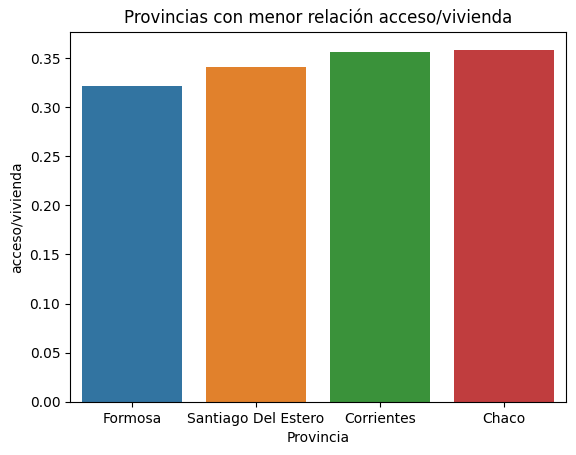

In [ ]:
sns.barplot(x='Provincia',y='acceso/vivienda',data=acceso_viv_orden.loc[0:3]).set(title='Provincias con menor relación acceso/vivienda')

Identificamos las tres provincias con menor acceso a través de cablemodem, el cual es la principal tecnologia usada en Argentina.Se identifica además, en la tabla que la tecnologia que reemplaza a cablemodem son fibra optica y ADSL

In [ ]:
cablemodem_provincia=censo_tecnologia[['Provincia','CABLEMODEM','FIBRA OPTICA','ADSL','TOTAL VIVIENDAS']].sort_values(by='CABLEMODEM').reset_index().loc[0:2]

In [ ]:
cablemodem_provincia.head()

,index,Provincia,CABLEMODEM,FIBRA OPTICA,ADSL,TOTAL VIVIENDAS
0,2,Catamarca,10495,46224,10010,159438
1,23,Tucuman,18518,162345,77738,555801
2,17,San Juan,22723,12328,38570,265434


[Text(0.5, 1.0, 'Total accesos cablemodem en las tres provincia con mayor acceso')]

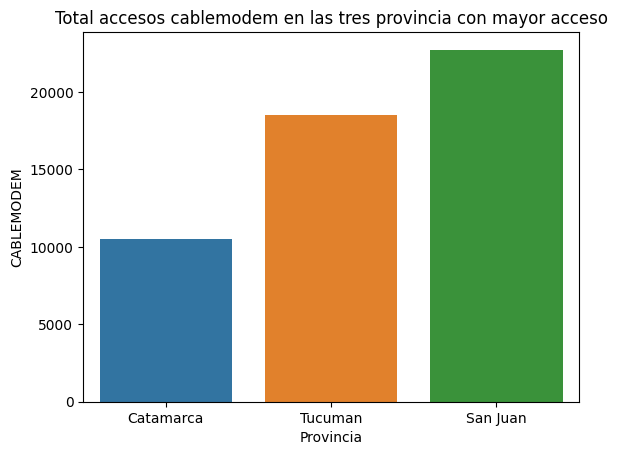

In [ ]:

sns.barplot(x='Provincia',y='CABLEMODEM',data=cablemodem_provincia).set(title='Total accesos cablemodem en las tres provincia con mayor acceso')

Cargamos y analizamos el archivo internet accesos por tecnologia, la cual contiene información segmentada por provincia, año y trimestre.

In [ ]:
acceos_anio = pd.read_csv('/content/Internet_Accesos-por-tecnologias.csv',thousands='.',sep=';')

In [ ]:
acceos_anio.head()# vemos los primeros 5 registos

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679
2,2022,3,Catamarca,10010,10495,46224,1329,2235,70293
3,2022,3,Chaco,27164,61800,44645,8178,2359,144146
4,2022,3,Chubut,45377,72212,9574,29784,8831,165778


In [ ]:
acceos_anio.info()# se observa que los datos son leidos con el tipo de dato correcto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           840 non-null    int64 
 1   Trimestre     840 non-null    int64 
 2   Provincia     840 non-null    object
 3   ADSL          840 non-null    int64 
 4   Cablemodem    840 non-null    int64 
 5   Fibra óptica  840 non-null    int64 
 6   Wireless      840 non-null    int64 
 7   Otros         840 non-null    int64 
 8   Total         840 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 59.2+ KB


In [ ]:
trim_4 =acceos_anio[acceos_anio['Trimestre']==4]# seleccionamos solo trimestre 4

Graficamos la tendencia de acceso a internet en las tres provincias con mayor acceso a internet: BUENOS AIRES, CABA,CORDOBA, se observa que Buenos aires presenta un acelerado crecimiento en cuanto accesos, mientras que en CABA la tendencia es constante. Podría explicarse la tendencia en CABA a que como se observa en la tabla, la relación acceso/vivienda es mayor al 94% se entenderia que; en CABA se llego al limite en cuanto a accesos por vivienda.

<Axes: xlabel='Año', ylabel='Total'>

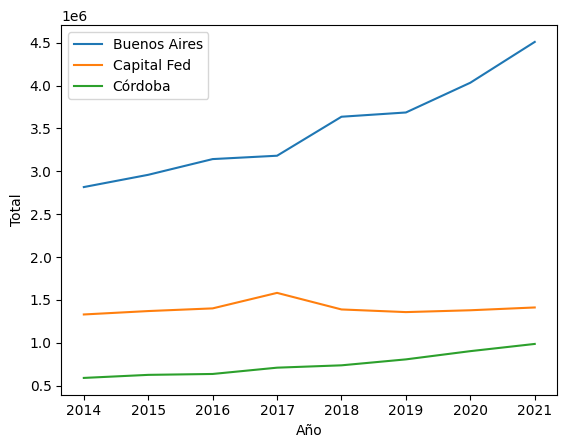

In [ ]:
sns.lineplot(x='Año',y='Total',data=trim_4[trim_4['Provincia']=='Buenos Aires'],label='Buenos Aires');
sns.lineplot(x='Año',y='Total',data=trim_4[trim_4['Provincia']=='Capital Federal'],label='Capital Fed');
sns.lineplot(x='Año',y='Total',data=trim_4[trim_4['Provincia']=='Córdoba'],label='Córdoba')

In [ ]:
censo_tecnologia[['Provincia','acceso/vivienda','Total general']].sort_values(by='Total general',ascending=False).reset_index(drop=True).loc[0:2]

,Provincia,acceso/vivienda,Total general
0,Buenos Aires,0.704536,4721668
1,Caba,0.943298,1547679
2,Cordoba,0.635697,1038668


KPI 1: Alcanzar una relacción de acceso de internet por numero total de vivienda en la provincia de Córdoba del 80% para el año 2024

Cargamos el dataframe de internet ingresos

In [ ]:
ingresos = pd.read_csv('/content/Internet_Ingresos.csv',thousands='.')

In [ ]:
ingresos.head()#vemos los primeros 5 registros

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67055930,Jul-Sept 2022
1,2022,2,60335724,Abr-Jun 2022
2,2022,1,55589997,Ene-Mar 2022
3,2021,4,45467887,Oct-Dic 2021
4,2021,3,42999944,Jul-Sept 2021


generamos un dataframe con los ingresos por año solo para trimestre 4

In [ ]:
ing_t4=ingresos[ingresos['Trimestre']==4]

Observamos que a partir del año 2018 se evidencia un incremento acelerado de los ingresos por concepto de internet en el intervalo de tiempo 2014-2021.

[Text(0.5, 1.0, 'Ingresos por año acceso a internet Argentina')]

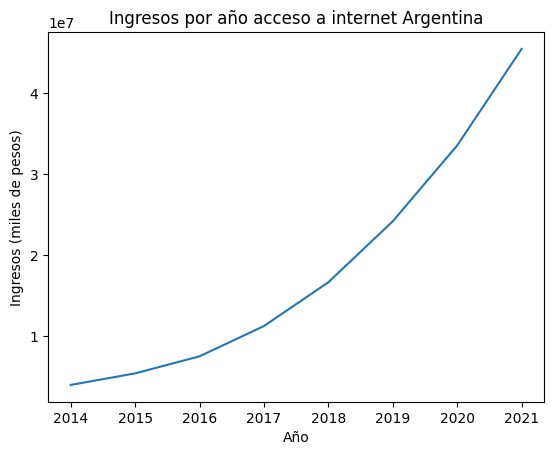

In [ ]:
sns.lineplot(x = 'Año',y='Ingresos (miles de pesos)', data=ing_t4).set(title='Ingresos por año acceso a internet Argentina')

Cargamos datos que contienen historico de velocidad media de bajada en mbps

In [ ]:
historico_velocidad = pd.read_csv('/content/historico_velocidad_internet (1).csv')

In [ ]:
historico_velocidad.head()#vemos los primeros 5 registros

,Año,Trimestre,Provincia,Mbps (Media de bajada),Unnamed: 4,Unnamed: 5
0,2022,3,Buenos Aires,70,NaN,NaN
1,2022,3,Capital Federal,101,NaN,NaN
2,2022,3,Catamarca,61,NaN,NaN
3,2022,3,Chaco,53,NaN,NaN
4,2022,3,Chubut,16,NaN,NaN


Para hacer el analisis tomamos solo trimestre 4

In [ ]:
his_vel_4=historico_velocidad[historico_velocidad['Trimestre']==4]

Agrupamos por año y obtenemos la media de mbps

In [ ]:
agrupacion_anio=his_vel_4.groupby('Año').mean()['Mbps (Media de bajada)'].reset_index()

<ipython-input-35-90544b86f130>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agrupacion_anio=his_vel_4.groupby('Año').mean()['Mbps (Media de bajada)'].reset_index()


Generamos un dataframe con media de bajada de mbps por año e ingresos por año

In [ ]:
ingre_mbps=agrupacion_anio.merge(ing_t4,on='Año')

In [ ]:
ingre_mbps.head()

,Año,Mbps (Media de bajada),Trimestre,Ingresos (miles de pesos),Periodo
0,2014,3.666667,4,3950441,Oct-Dic 2014
1,2015,4.416667,4,5376899,Oct-Dic 2015
2,2016,5.083333,4,7483980,Oct-Dic 2016
3,2017,8.416667,4,11226127,Oct-Dic 2017
4,2018,10.541667,4,16637687,Oct-Dic 2018


Miramos si existe correlacion entre la media de bajada y los ingresos, se tiene como hipotesis que a mayor mbps mayor ingreso, calculamos la correlacion.

[Text(0.5, 1.0, 'Mbps vs Ingresos por accesoa internet')]

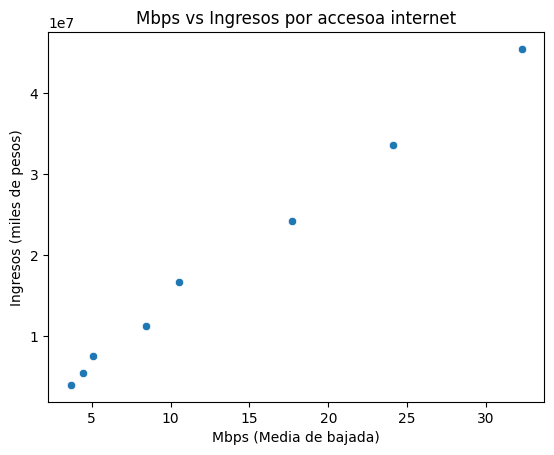

In [ ]:
sns.scatterplot(x='Mbps (Media de bajada)',y='Ingresos (miles de pesos)',data=ingre_mbps).set(title='Mbps vs Ingresos por accesoa internet')

In [ ]:
datos = ingre_mbps[['Mbps (Media de bajada)','Ingresos (miles de pesos)']]

vemos que existe una fuerte correlacion entre la media de bajada de mbps con respecto a los ingresos

In [ ]:
np.corrcoef(datos.T)[1,0]

0.9979832542349767